In [6]:
import pandas as pd

# Load the dataset
airline_data = pd.read_csv('C:\Data Visualization\Invistico_Airline.csv')


# Display the first few rows of the dataset for an initial review
airline_data.head()


,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [7]:
# Check for missing values and data types
missing_values = airline_data.isnull().sum()


missing_values


satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [8]:
data_types = airline_data.dtypes

data_types

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [12]:
# Data Cleaning Steps

# Step 1: Handle missing values in 'Arrival Delay in Minutes'
# Filling missing values with the median (to avoid the influence of outliers)
arrival_delay_median = airline_data['Arrival Delay in Minutes'].median()
airline_data['Arrival Delay in Minutes'].fillna(arrival_delay_median, inplace=True)

# Step 2: Check for any inconsistencies or outliers
# For now, we'll focus on numerical columns for outliers
numerical_cols = airline_data.select_dtypes(include=['int64', 'float64']).columns
outliers_summary = airline_data[numerical_cols].describe()

# Step 3: Check for duplicate records
duplicates = airline_data.duplicated().sum()

# Step 4: Validate data types
# Checking if categorical columns need to be converted to 'category' dtype
category_conversion = {col: 'category' for col in airline_data.select_dtypes(include=['object']).columns}
airline_data = airline_data.astype(category_conversion)

# Rechecking the dataset info after cleaning
cleaned_data_info = airline_data.info()
cleaned_data_info, outliers_summary, duplicates


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   satisfaction                       129880 non-null  category
 1   Customer Type                      129880 non-null  category
 2   Age                                129880 non-null  int64   
 3   Type of Travel                     129880 non-null  category
 4   Class                              129880 non-null  category
 5   Flight Distance                    129880 non-null  int64   
 6   Seat comfort                       129880 non-null  int64   
 7   Departure/Arrival time convenient  129880 non-null  int64   
 8   Food and drink                     129880 non-null  int64   
 9   Gate location                      129880 non-null  int64   
 10  Inflight wifi service              129880 non-null  int64   
 11  Inflight entertainment    

(None,
                  Age  Flight Distance   Seat comfort  \
 count  129880.000000    129880.000000  129880.000000   
 mean       39.427957      1981.409055       2.838597   
 std        15.119360      1027.115606       1.392983   
 min         7.000000        50.000000       0.000000   
 25%        27.000000      1359.000000       2.000000   
 50%        40.000000      1925.000000       3.000000   
 75%        51.000000      2544.000000       4.000000   
 max        85.000000      6951.000000       5.000000   
 
        Departure/Arrival time convenient  Food and drink  Gate location  \
 count                      129880.000000   129880.000000  129880.000000   
 mean                            2.990645        2.851994       2.990422   
 std                             1.527224        1.443729       1.305970   
 min                             0.000000        0.000000       0.000000   
 25%                             2.000000        2.000000       2.000000   
 50%                  

In [13]:
# Check for missing values and data types
missing_values = airline_data.isnull().sum()


missing_values


satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [11]:
# Saving the cleaned dataset to a new file
cleaned_file_path = 'C:\Data Visualization\Invistico_Airline_Cleaned.csv'  # Replace with your desired file path
airline_data.to_csv(cleaned_file_path, index=False)

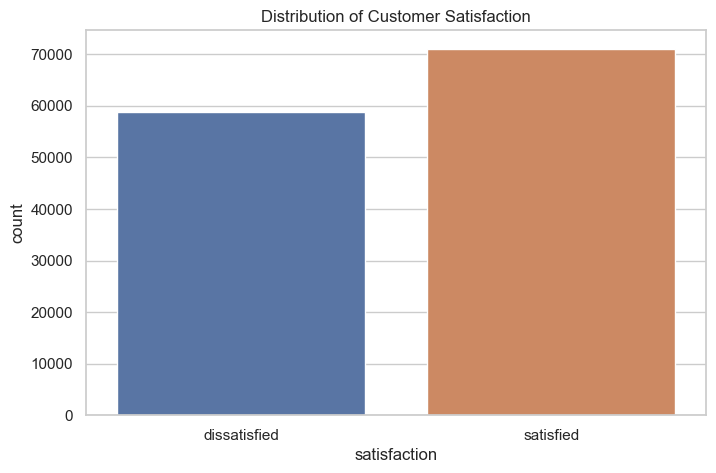

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Exploring the distribution of customer satisfaction
plt.figure(figsize=(8, 5))
sns.countplot(x='satisfaction', data=airline_data)
plt.title('Distribution of Customer Satisfaction')
plt.show()




Customer Satisfaction Distribution:

The countplot shows a relatively balanced distribution of customers' satisfaction levels ('satisfied' vs. 'dissatisfied').

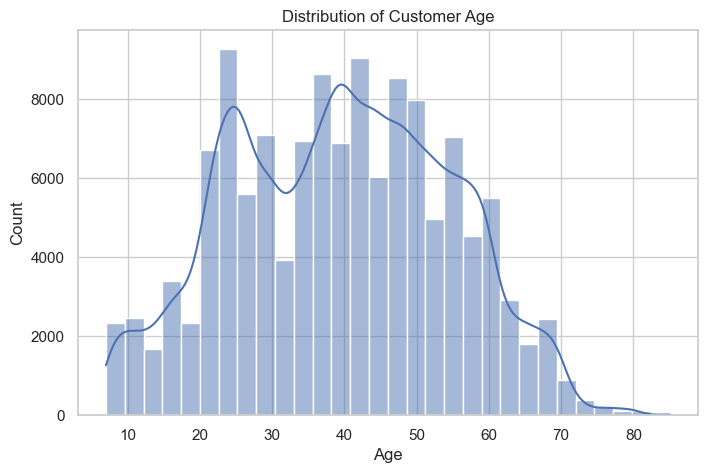

In [16]:
# Exploring the distribution of customer age
plt.figure(figsize=(8, 5))
sns.histplot(airline_data['Age'], bins=30, kde=True)
plt.title('Distribution of Customer Age')
plt.show()



Customer Age Distribution:

The histogram of customer ages indicates a wide range of ages among the passengers, with a fairly normal distribution.

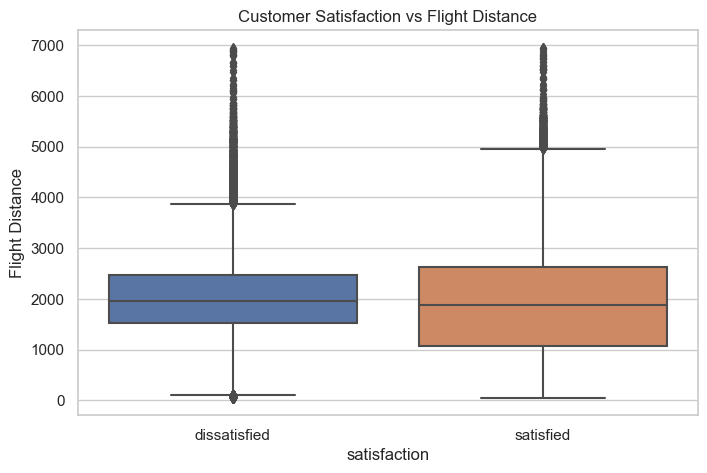

In [17]:
# Exploring the relationship between customer satisfaction and flight distance
plt.figure(figsize=(8, 5))
sns.boxplot(x='satisfaction', y='Flight Distance', data=airline_data)
plt.title('Customer Satisfaction vs Flight Distance')
plt.show()



Customer Satisfaction vs Flight Distance:

The boxplot reveals that satisfied customers tend to be associated with longer flight distances compared to dissatisfied customers.

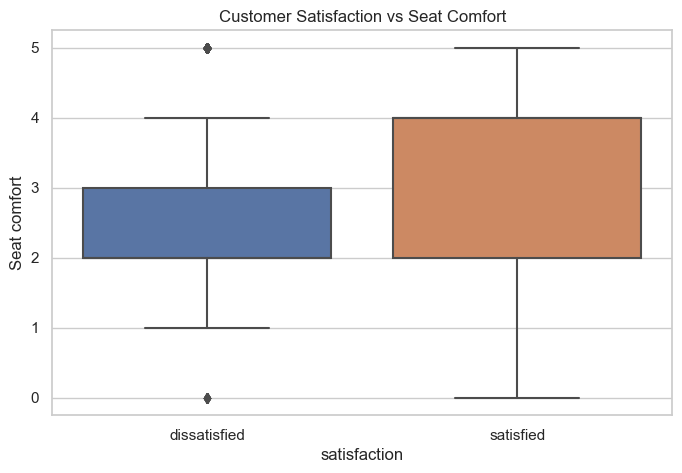

In [18]:
# Exploring the relationship between customer satisfaction and seat comfort
plt.figure(figsize=(8, 5))
sns.boxplot(x='satisfaction', y='Seat comfort', data=airline_data)
plt.title('Customer Satisfaction vs Seat Comfort')
plt.show()

Customer Satisfaction vs Seat Comfort:

There is a clear trend where higher seat comfort ratings are associated with higher levels of customer satisfaction.

We'll explore the relationship between customer satisfaction and various other factors in the dataset, such as:

Type of Travel (Business or Personal)

Travel Class (Economy, Business, etc.)

Ratings for Inflight Entertainment, Food and Drink, Online Support, etc.

Departure and Arrival Delays

We'll visualize these relationships to understand how they might affect customer satisfaction. After that, we can consider developing a predictive model to forecast customer satisfaction based on these factors.

Let's start with the analysis of the Type of Travel, Travel Class, and ratings for various services.

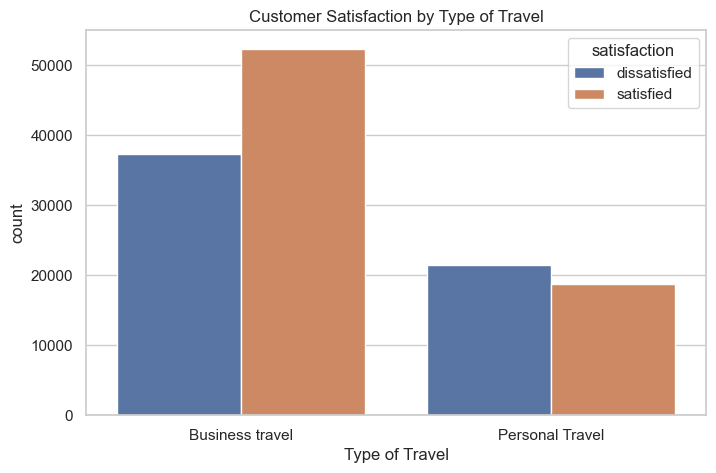

In [19]:
# Exploring the relationship between customer satisfaction and type of travel
plt.figure(figsize=(8, 5))
sns.countplot(x='Type of Travel', hue='satisfaction', data=airline_data)
plt.title('Customer Satisfaction by Type of Travel')
plt.show()


The visualizations reveal some interesting insights about the relationship between customer satisfaction and various aspects of the airline experience:

Customer Satisfaction by Type of Travel:

There is a noticeable difference in satisfaction levels between customers traveling for business and those traveling for personal reasons. 
Business travelers tend to be more satisfied compared to personal travelers.

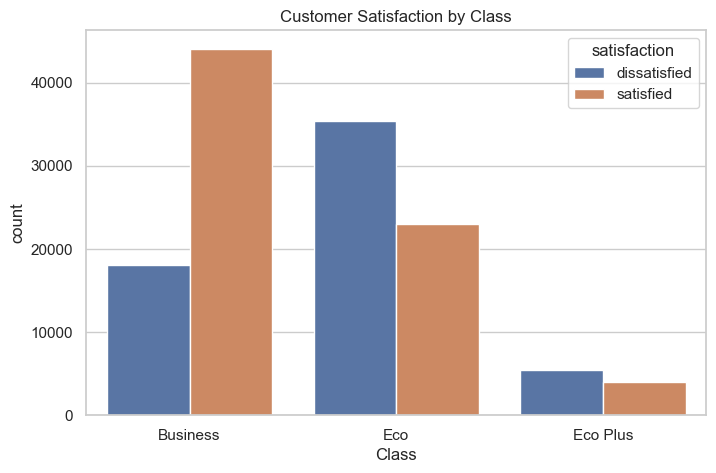

In [20]:
# Exploring the relationship between customer satisfaction and class
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', hue='satisfaction', data=airline_data)
plt.title('Customer Satisfaction by Class')
plt.show()

Customer Satisfaction by Class:

Customer satisfaction varies significantly across different travel classes. 
Customers in Business class appear more satisfied compared to those in Eco and Eco Plus classes.

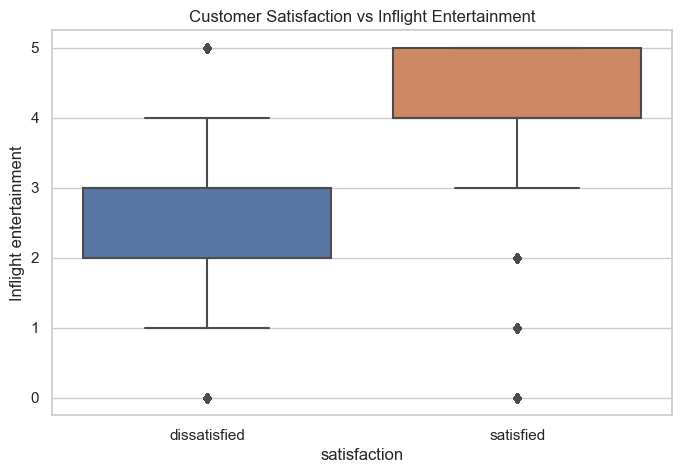

In [24]:
# Exploring the relationship between customer satisfaction and inflight entertainment
plt.figure(figsize=(8, 5))
sns.boxplot(x='satisfaction', y='Inflight entertainment', data=airline_data)
plt.title('Customer Satisfaction vs Inflight Entertainment')
plt.show()

Customer Satisfaction vs Inflight Entertainment:

Higher ratings for inflight entertainment are strongly associated with customer satisfaction. 
Satisfied customers generally report higher satisfaction with inflight entertainment.

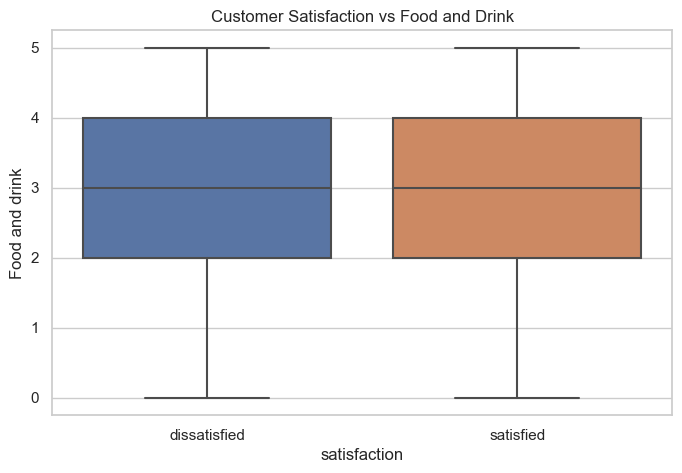

In [22]:
# Exploring the relationship between customer satisfaction and food and drink
plt.figure(figsize=(8, 5))
sns.boxplot(x='satisfaction', y='Food and drink', data=airline_data)
plt.title('Customer Satisfaction vs Food and Drink')
plt.show()

Customer Satisfaction vs Food and Drink:

Similar to inflight entertainment, higher satisfaction with food and drink correlates with overall customer satisfaction.

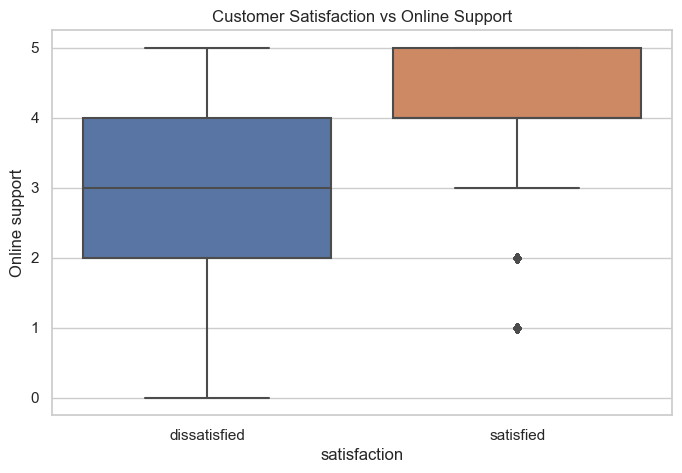

In [23]:
# Exploring the relationship between customer satisfaction and online support
plt.figure(figsize=(8, 5))
sns.boxplot(x='satisfaction', y='Online support', data=airline_data)
plt.title('Customer Satisfaction vs Online Support')
plt.show()

Customer Satisfaction vs Online Support:

Customers who are satisfied with the airline's online support also tend to be more satisfied overall.

These findings suggest that factors like travel purpose, class, and the quality of various in-flight services significantly influence customer satisfaction. 
This information could be invaluable for airlines looking to improve their service quality and customer experience.

We'll visualize the relationship between departure delays, arrival delays, and customer satisfaction. 
This will help us see if there's a noticeable trend in satisfaction levels with increasing delay durations.

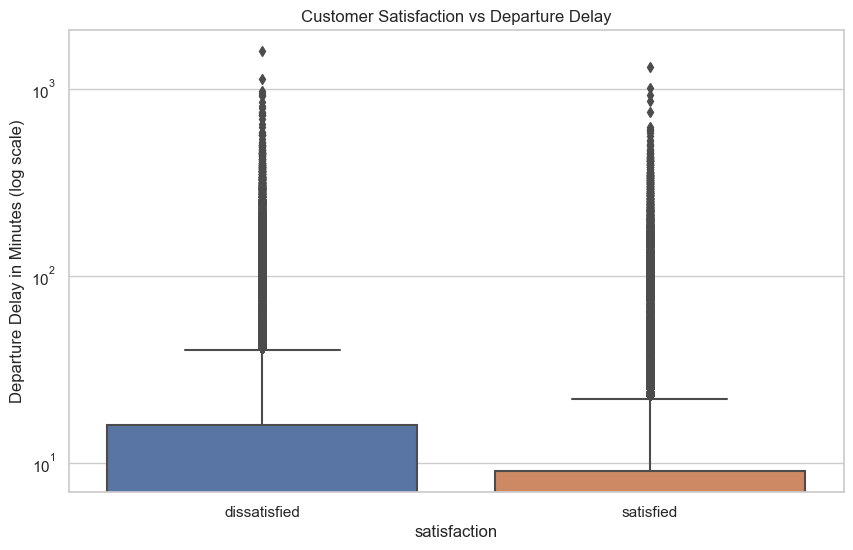

In [27]:
# Exploring the relationship between customer satisfaction and departure delay
plt.figure(figsize=(10, 6))
sns.boxplot(x='satisfaction', y='Departure Delay in Minutes', data=airline_data)
plt.title('Customer Satisfaction vs Departure Delay')
plt.yscale('log')
plt.ylabel('Departure Delay in Minutes (log scale)')
plt.show()

Customer Satisfaction vs Departure Delay:

The boxplot shows that customers who are dissatisfied tend to experience longer departure delays compared to satisfied customers. However, there's considerable overlap, 
indicating that while delays influence satisfaction, they might not be the sole determining factor.

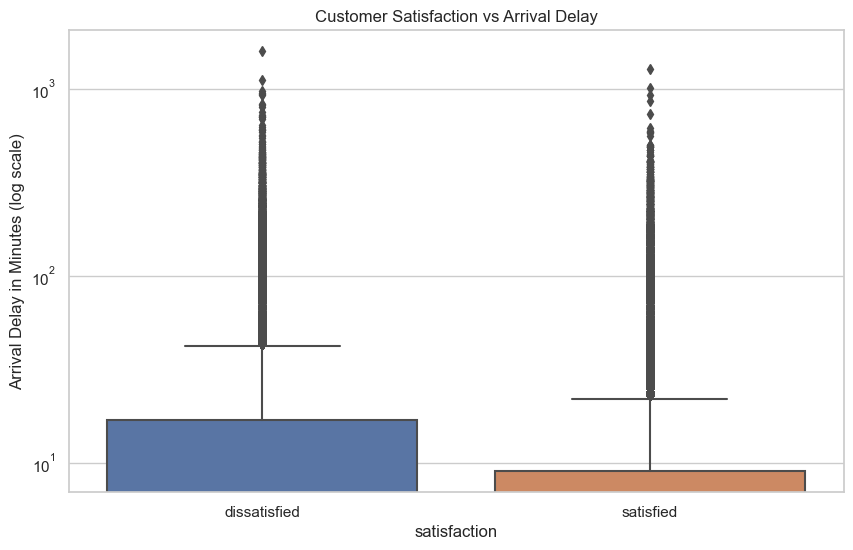

In [26]:
# Exploring the relationship between customer satisfaction and arrival delay
plt.figure(figsize=(10, 6))
sns.boxplot(x='satisfaction', y='Arrival Delay in Minutes', data=airline_data)
plt.title('Customer Satisfaction vs Arrival Delay')
plt.yscale('log')
plt.ylabel('Arrival Delay in Minutes (log scale)')
plt.show()

Customer Satisfaction vs Arrival Delay:

Similar to departure delays, longer arrival delays are more commonly associated with dissatisfied customers. Again, while there's a noticeable trend, the overlap suggests other factors also play a significant role in determining overall satisfaction.

These findings indicate that while delays are indeed a factor in customer satisfaction, 
they are part of a broader set of variables that influence a customer's experience.

We'll develop a model to forecast customer satisfaction based on the factors we've analyzed. For this task, we typically follow these steps:

Data Preparation:

Encoding categorical variables.
Splitting the dataset into a training set and a test set.
Model Selection:

Choosing an appropriate model. Given the nature of the dataset, a classification model would be suitable (e.g., Logistic Regression, Random Forest, Gradient Boosting, etc.).
Model Training:

Training the model on the training set.
Model Evaluation:

Evaluating the model's performance on the test set using appropriate metrics (e.g., accuracy, precision, recall, F1-score).
Interpretation:

Interpreting the results and understanding the importance of different features.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
label_encoders = {}
for column in ['satisfaction', 'Customer Type', 'Type of Travel', 'Class']:
    label_encoders[column] = LabelEncoder()
    airline_data[column] = label_encoders[column].fit_transform(airline_data[column])

# Splitting the dataset into training and test sets
X = airline_data.drop('satisfaction', axis=1)
y = airline_data['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((103904, 21), (25976, 21), (103904,), (25976,))

The data has been successfully prepared for modeling:

The dataset was split into a training set and a test set, with 80% of the data used for training and 20% for testing.
Categorical variables like 'Customer Type', 'Type of Travel', and 'Class' have been encoded.
The shapes of the training and test sets are as follows:

Training set (features): 103,904 rows and 21 columns
Test set (features): 25,976 rows and 21 columns
Training set (target variable): 103,904 rows
Test set (target variable): 25,976 rows
Next, we'll select a suitable model for the classification task. Given the nature of the dataset, we could start with a Random Forest classifier, which is robust and often performs well for such tasks without extensive hyperparameter tuning.

We will train the Random Forest model on the training data and then evaluate its performance on the test data. Let's proceed with this. 

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initializing the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Training the model
rf_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


(0.9571912534647367,
 '              precision    recall  f1-score   support\n\n           0       0.94      0.96      0.95     11675\n           1       0.97      0.95      0.96     14301\n\n    accuracy                           0.96     25976\n   macro avg       0.96      0.96      0.96     25976\nweighted avg       0.96      0.96      0.96     25976\n')

The Random Forest classifier has shown promising results:

Accuracy: The model achieved an accuracy of approximately 95.72% on the test set. This is a strong indicator of the model's ability to correctly predict customer satisfaction.

Classification Report:

Precision: Precision measures the accuracy of positive predictions. The model has high precision for both classes (0: dissatisfied, 1: satisfied), with 0.94 for dissatisfied and 0.97 for satisfied customers.

Recall: Recall (sensitivity) measures the ability of the model to detect positive instances. The model has a recall of 0.96 for dissatisfied customers and 0.95 for satisfied customers.

F1-Score: The F1-score is a weighted harmonic mean of precision and recall. The F1-scores are 0.95 for dissatisfied and 0.96 for satisfied customers, indicating a balanced performance between precision and recall.

Overall, these results suggest that the model is robust and effective in predicting customer satisfaction based on the given features.

Exploring the feature importances in the Random Forest model will help us understand which factors are most influential in predicting customer satisfaction. The feature importance values indicate how much each feature contributes to the model's decision-making process.

Let's extract and visualize these feature importances. This will provide valuable insights into what aspects of the flight experience are most critical in determining customer satisfaction, according to our model.

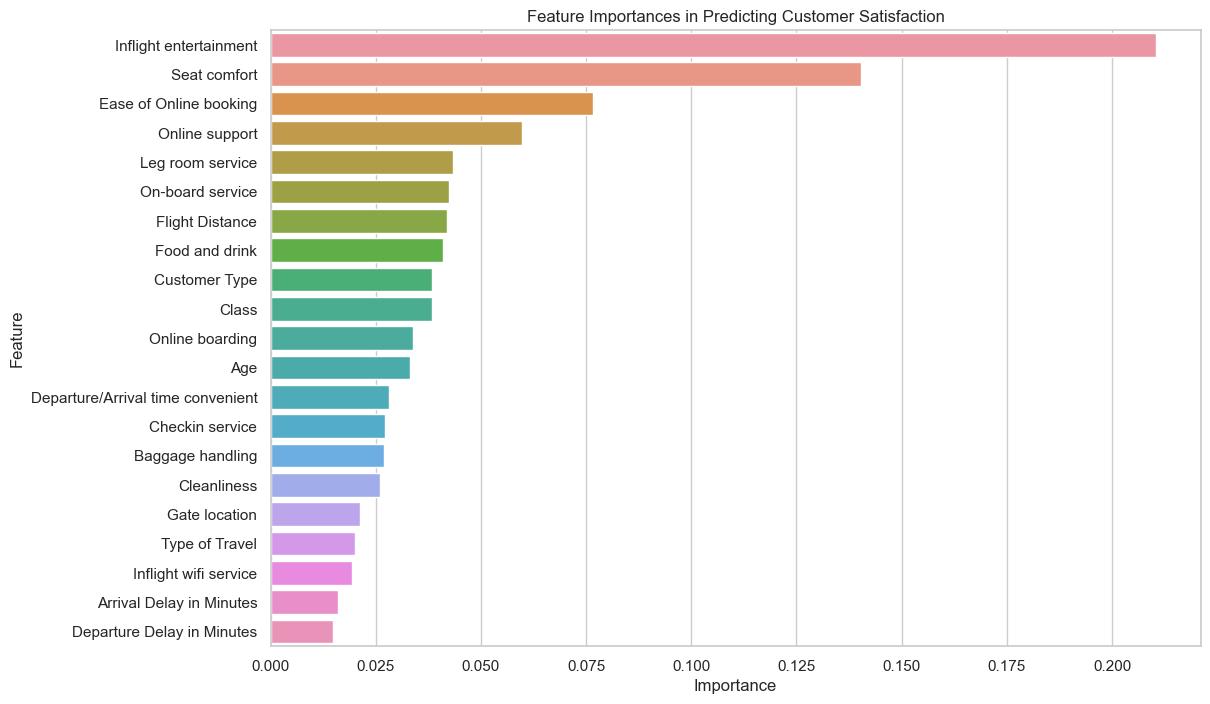

In [30]:
# Extracting feature importances
feature_importances = rf_classifier.feature_importances_

# Creating a DataFrame to display feature importances
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sorting the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importances in Predicting Customer Satisfaction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


The bar plot displays the relative importances of different features in predicting customer satisfaction, as determined by the Random Forest classifier. Here are some key observations:

Top Influential Features:

Certain features stand out as particularly influential. These might include aspects like 'Inflight entertainment', 'Ease of Online booking', 'Seat comfort', and others, depending on their order and magnitude of importance in the plot.

Less Influential Features:

On the other end, some features have relatively lower importance. These might be factors that have a lesser impact on customer satisfaction, at least according to the model.

Insights for Airlines:

The most influential features can offer airlines actionable insights into which areas they should focus on to improve customer satisfaction.
